### Import Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 500)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn import neighbors
from sklearn.svm import SVR
import dateutil
import time
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score, make_scorer

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_validate,  KFold

In [2]:
# Import dataset
df = pd.read_csv('KAG_energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


### Data exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [4]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [5]:
# columns value_count
df.apply(lambda x: len(x.unique()))

date           19735
Appliances        92
lights             8
T1               722
RH_1            2547
T2              1650
RH_2            3376
T3              1426
RH_3            2618
T4              1390
RH_4            2987
T5              2263
RH_5            7571
T6              4446
RH_6            9709
T7              1955
RH_7            5891
T8              2228
RH_8            6649
T9               924
RH_9            3388
T_out           1730
Press_mm_hg     2189
RH_out           566
Windspeed        189
Visibility       413
Tdewpoint       1409
rv1            19735
rv2            19735
dtype: int64

In [6]:
df_copy=df.copy()

In [7]:
Temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]
Humidity = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]
Weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg","Windspeed","Visibility"] 
Lighting = ["lights"]
Random = ["rv1", "rv2"]
target = ["Appliances"]

array([[<Axes: title={'center': 'Appliances'}>,
        <Axes: title={'center': 'T1'}>, <Axes: title={'center': 'T2'}>,
        <Axes: title={'center': 'T3'}>, <Axes: title={'center': 'T4'}>],
       [<Axes: title={'center': 'T5'}>, <Axes: title={'center': 'T6'}>,
        <Axes: title={'center': 'T7'}>, <Axes: title={'center': 'T8'}>,
        <Axes: title={'center': 'T9'}>],
       [<Axes: title={'center': 'RH_1'}>,
        <Axes: title={'center': 'RH_2'}>,
        <Axes: title={'center': 'RH_3'}>,
        <Axes: title={'center': 'RH_4'}>,
        <Axes: title={'center': 'RH_5'}>],
       [<Axes: title={'center': 'RH_6'}>,
        <Axes: title={'center': 'RH_7'}>,
        <Axes: title={'center': 'RH_8'}>,
        <Axes: title={'center': 'RH_9'}>,
        <Axes: title={'center': 'T_out'}>],
       [<Axes: title={'center': 'Tdewpoint'}>,
        <Axes: title={'center': 'RH_out'}>,
        <Axes: title={'center': 'Press_mm_hg'}>,
        <Axes: title={'center': 'Windspeed'}>,
        <Axe

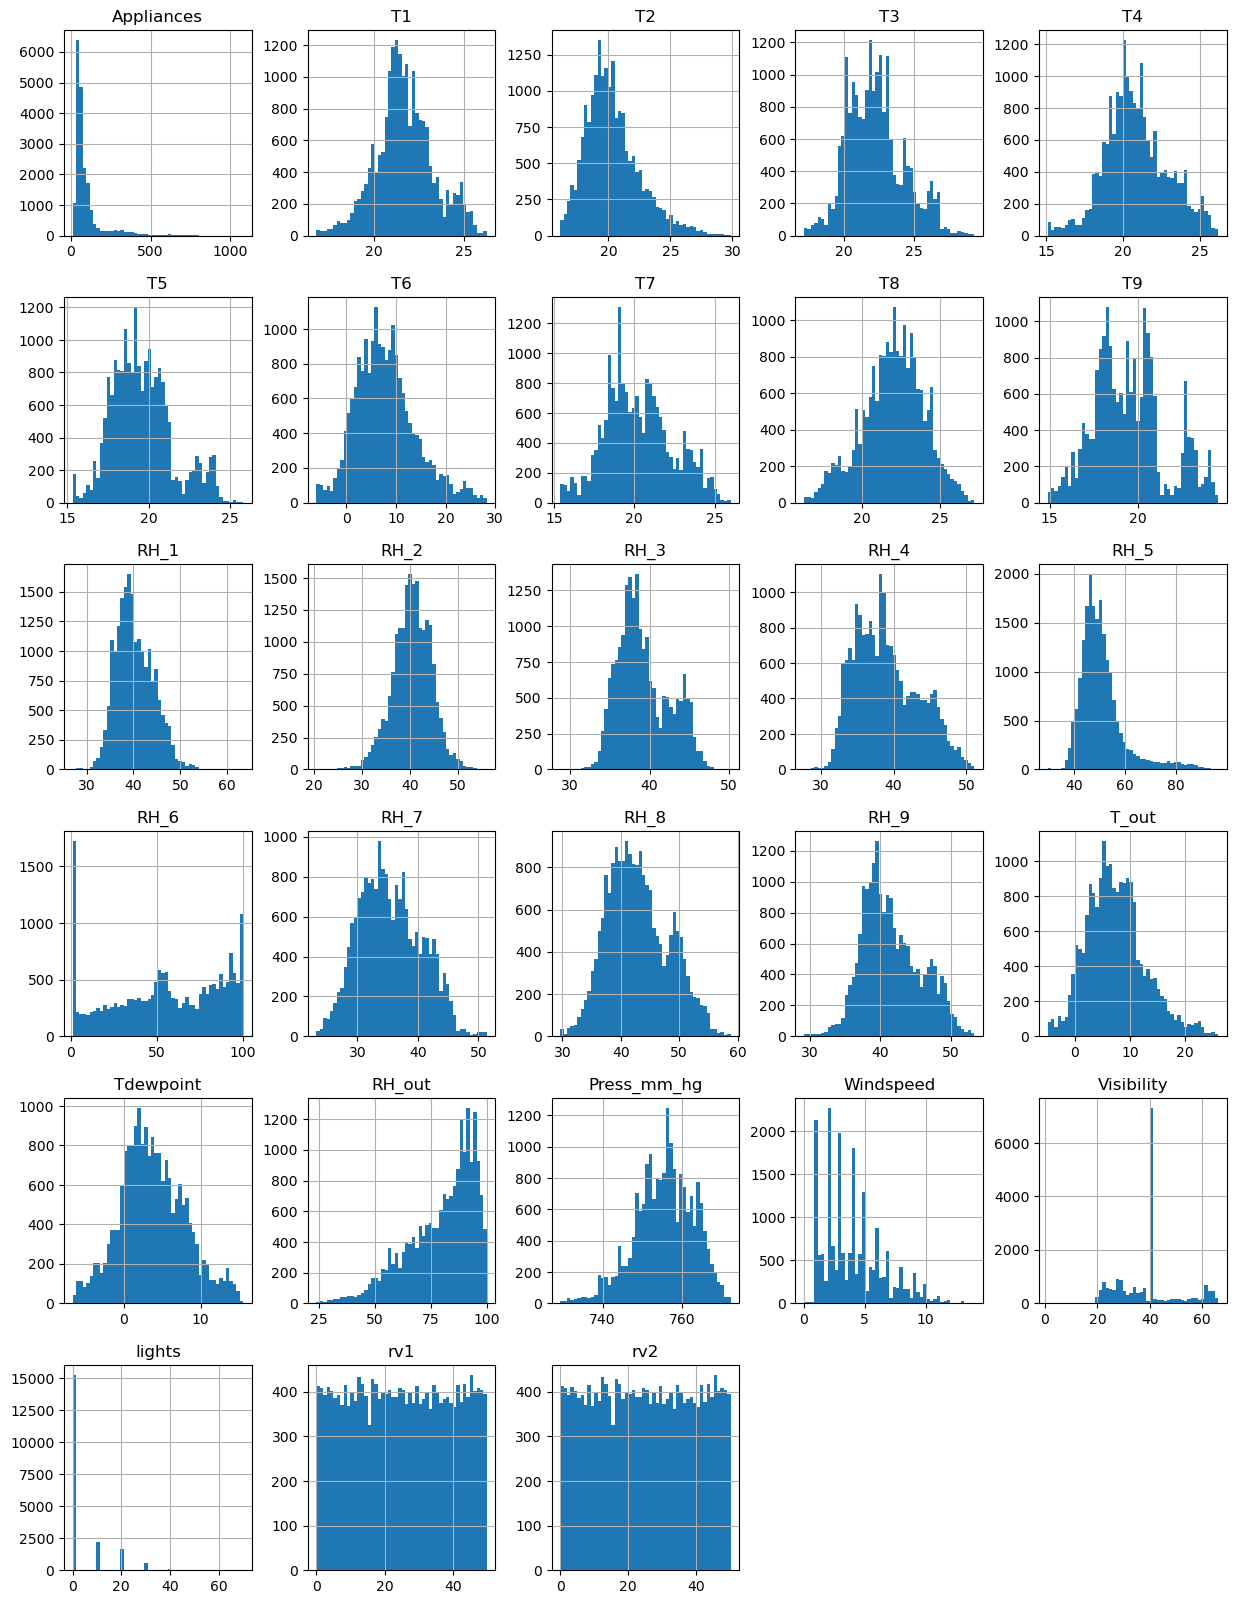

In [8]:
df_copy[target + Temp+ Humidity+ Weather+ Lighting+ Random].hist(bins=50, figsize=(15,20))

Appliances column is skewed, it has to be normalized. A lognormal of appliances column is included in the dataframe

### Performing Feature Engineering to extract more useful features

In [8]:
#df["Date"]=df['date'].str.split(' ').str[0]

#df["hours"]=(df['date'].str.split(':').str[0].str.split(" ").str[1]).astype(str).astype(int)
#df["seconds"]=((df['date'].str.split(':').str[1])).astype(str).astype(int).mul(60)

#df["week"]=(df['date'].str.split(' ').str[0])
#df["week"]=(df['week'].apply(dateutil.parser.parse, dayfirst=True))
#df["weekday"]=(df['week'].dt.dayofweek).astype(str).astype(int)
#df["week"]=(df['week'].dt.day_name())


#df['Light_rate'] = df['hours'] * df['lights']

df['date']=pd.to_datetime(df['date']) #Convert date column to datetime

#Extract hour, month
df['hour']=df['date'].dt.hour
df['month']=df['date'].dt.month
df['weekday']=df['date'].dt.weekday


df.head(5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,hour,month,weekday
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,17,1,0
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,17,1,0
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,17,1,0
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,17,1,0
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,17,1,0


In [10]:
df['weekday'].value_counts()

weekday
1    2880
2    2880
3    2880
4    2845
0    2778
5    2736
6    2736
Name: count, dtype: int64

In [9]:
df.drop('date', axis=1, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 non-null  float64
 19  RH_9

In [13]:
df.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,hour,month,weekday
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,0.019760,0.006955,0.117638,-0.083178,0.025801,-0.055642,0.039572,-0.094039,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145,0.216792,-0.011606,0.003060
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,-0.078745,0.141233,-0.079029,0.153756,-0.135347,0.035069,-0.071458,0.012915,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521,0.255346,-0.179452,-0.099828
T1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,0.885247,-0.014782,0.654769,-0.615045,0.838705,0.135182,0.825413,-0.006441,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203,0.178858,0.706305,0.001381
RH_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,0.205797,0.303258,0.316141,0.245126,0.021397,0.801122,-0.030053,0.736196,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699,0.018594,-0.094048,-0.053782
T2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,0.720550,0.029595,0.801186,-0.580372,0.663660,0.229212,0.578191,0.068534,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087,0.254784,0.533479,0.000602
RH_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,0.110409,0.250271,-0.009670,0.389933,-0.051422,0.690584,-0.041023,0.679777,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275,-0.183322,-0.097914,-0.044249
T3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,0.888169,-0.066355,0.686882,-0.647672,0.847374,0.172624,0.795283,0.044427,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194,0.037624,0.790365,-0.017514
RH_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,-0.050062,0.375422,0.076833,0.514912,-0.250090,0.832685,-0.283228,0.828822,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477,-0.052392,-0.414359,-0.035182
T4,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,0.871813,-0.076489,0.652350,-0.703149,0.877763,0.043527,0.796256,-0.095192,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815,0.088407,0.789168,-0.091006
RH_4,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,0.091812,0.352591,0.259047,0.392178,-0.131204,0.894301,-0.167066,0.847259,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787,-0.019068,-0.258167,-0.005749


### VIsualization

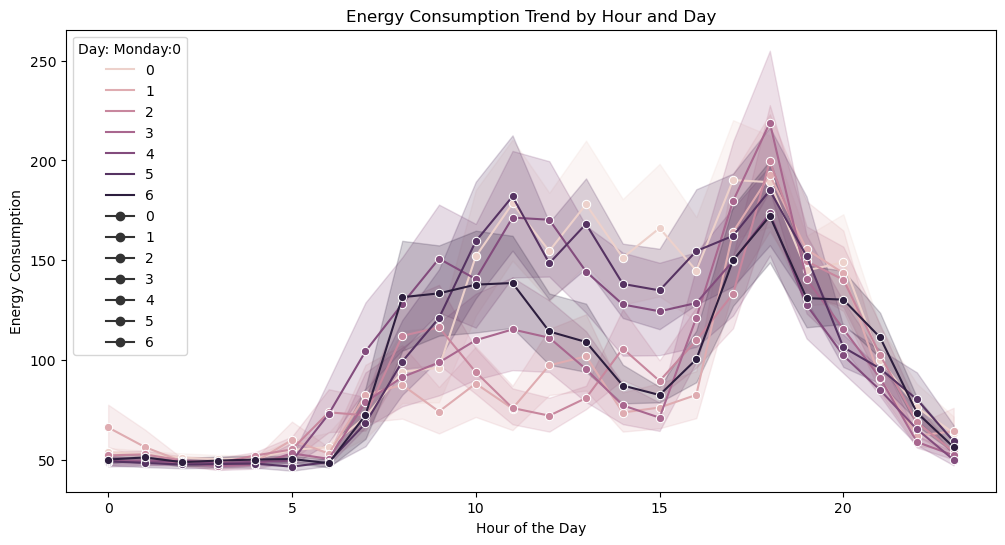

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='hour', y='Appliances', hue='weekday', style='weekday', markers=['o'], dashes=False)
plt.title('Energy Consumption Trend by Hour and Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Energy Consumption')
plt.legend(title='Day: Monday:0')

plt.savefig('Energy consumption by_day.png')
plt.show()

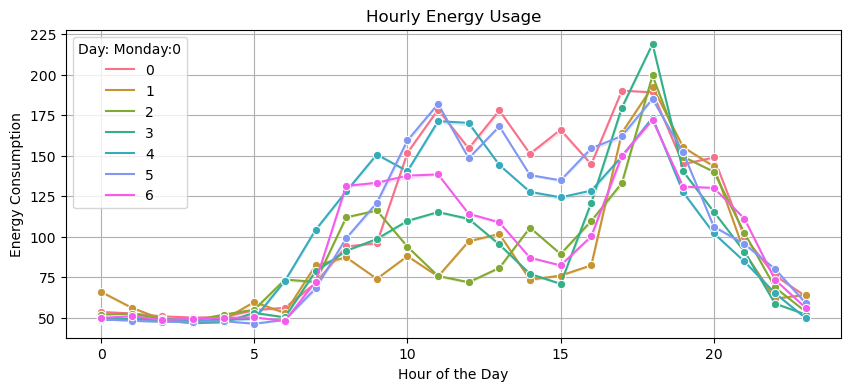

In [34]:


plt.figure(figsize=(10, 4))

color_palette = sns.color_palette("husl", 7)
sns.lineplot(data=df, x='hour', y='Appliances', hue='weekday', marker='o', palette=color_palette, linestyle='-', ci =False)
plt.title('Hourly Energy Usage')
plt.legend(title='Day: Monday:0')
plt.xlabel('Hour of the Day')
plt.ylabel('Energy Consumption')
plt.grid(True)
plt.savefig('Hourly Energy consumption.png')
plt.show()

In [16]:
hour_group=df.groupby(['hour', 'weekday'])['lights'].mean().reset_index()

In [17]:
hour_group

,hour,weekday,lights
0,0,0,4.473684
1,0,1,9.500000
2,0,2,3.666667
3,0,3,2.916667
4,0,4,1.000000
...,...,...,...
163,23,2,5.416667
164,23,3,4.083333
165,23,4,2.105263
166,23,5,1.754386


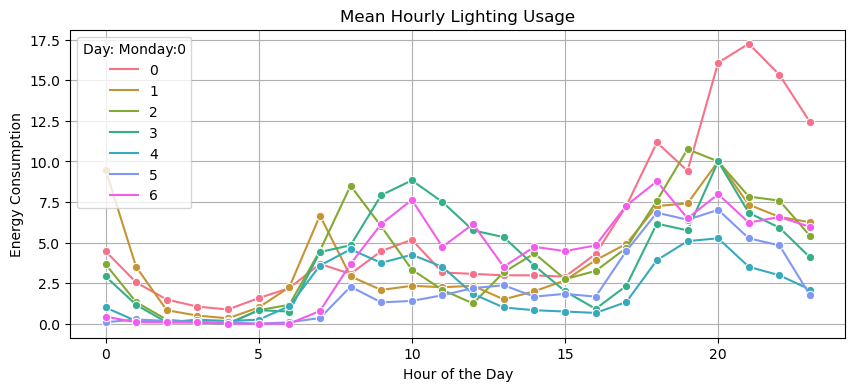

In [26]:
plt.figure(figsize=(10, 4))
color_palette = sns.color_palette("husl", 7)
sns.lineplot(data=hour_group, x='hour', y='lights', palette= color_palette, hue='weekday', marker='o', ci = False)
plt.title('Mean Hourly Lighting Usage')
plt.xlabel('Hour of the Day')
plt.ylabel('Energy Consumption')
plt.legend(title='Day: Monday:0')
plt.grid(True)
plt.savefig('Energy consumption by_day2.png')
plt.show()

### Preparing dataset for modelling

In [10]:
# Using the copied dataser
df_copy=df.copy()

In [11]:
df_copy.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,hour,month,weekday
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,17,1,0
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,17,1,0
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,17,1,0
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,17,1,0
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,17,1,0


In [30]:
#df_copy= df_copy[df_copy['Appliances'].between(df_copy['Appliances'].quantile(.0), df['Appliances'].quantile(.99))]

In [13]:
df_copy['appliances_log'] = np.log(df_copy['Appliances'])  #Transform target to log form

In [32]:
#numeric_df = df.select_dtypes(include=[float, int]) # Select only numeric columns for correlation calculation
corr_matrix = df_copy.corr(method='pearson') # Calculate the correlation matrix
matrix = corr_matrix["Appliances"].sort_values(ascending=False) # Get the correlation values for the 'appliances' column and sort them
print(matrix)

Appliances        1.000000
appliances_log    0.900397
hour              0.216792
lights            0.197278
T2                0.120073
T6                0.117638
T_out             0.099155
Windspeed         0.087122
RH_1              0.086031
T3                0.085060
T1                0.055447
T4                0.040281
T8                0.039572
RH_3              0.036292
T7                0.025801
T5                0.019760
RH_4              0.016965
Tdewpoint         0.015353
T9                0.010010
RH_5              0.006955
weekday           0.003060
Visibility        0.000230
rv2              -0.011145
rv1              -0.011145
month            -0.011606
Press_mm_hg      -0.034885
RH_9             -0.051462
RH_7             -0.055642
RH_2             -0.060465
RH_6             -0.083178
RH_8             -0.094039
RH_out           -0.152282
Name: Appliances, dtype: float64


<Axes: >

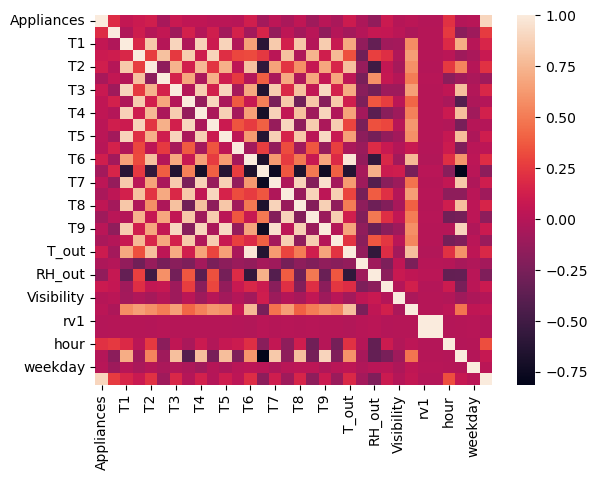

In [33]:
plt.figure(figsize=(10, 4))
sns.heatmap(corr_matrix)

In [14]:
df_copy['lights'] = df_copy['lights'].astype(float)
df_copy['appliances_log'] = df_copy['appliances_log'].astype(float)

In [35]:
features_set=list(matrix[(matrix>0.01) | (matrix<-0.03)].index) # Selecting features with corr above 0.003 with the target
features_set

['Appliances',
 'appliances_log',
 'hour',
 'lights',
 'T2',
 'T6',
 'T_out',
 'Windspeed',
 'RH_1',
 'T3',
 'T1',
 'T4',
 'T8',
 'RH_3',
 'T7',
 'T5',
 'RH_4',
 'Tdewpoint',
 'T9',
 'Press_mm_hg',
 'RH_9',
 'RH_7',
 'RH_2',
 'RH_6',
 'RH_8',
 'RH_out']

Considering the correlation between the target and the features, the above features have fairly positive and negative realtion.
They are thus chosen for the prediction 

In [15]:
df_copy=df_copy.rename({'Appliances':'EnergyConsumption'}, axis=1)
df_copy

,EnergyConsumption,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,hour,month,weekday,appliances_log
0,60,30.0,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,17,1,0,4.094345
1,60,30.0,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,17,1,0,4.094345
2,50,30.0,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,17,1,0,3.912023
3,50,40.0,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,17,1,0,3.912023
4,60,40.0,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,17,1,0,4.094345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,0.0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812,17,5,4,4.605170
19731,90,0.0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940,17,5,4,4.499810
19732,270,10.0,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117,17,5,4,5.598422
19733,420,10.0,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784,17,5,4,6.040255


In [37]:
x=df_copy.drop(['Visibility', 'rv1', 'rv2', 'EnergyConsumption', 'appliances_log', 'month'], axis=1)
y=df_copy['EnergyConsumption']

In [16]:
x_1=df_copy.drop(['Visibility', 'rv1', 'rv2', 'EnergyConsumption', 'appliances_log', 'month', 'hour'], axis=1)
y_1=df_copy['EnergyConsumption']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x_1, y_1, test_size = 0.30, random_state = 101)

In [23]:
et_model=ExtraTreesRegressor()
et_model.fit(X_train, y_train)

ExtraTreesRegressor()

In [24]:
def test_eva(model, Test, labels):

    pred=model.predict(Test) # Predict

    # Evaluation metrics
    mae=mean_absolute_error(labels, pred)
    rmse=np.sqrt(mean_squared_error(labels, pred))
    mape=mean_absolute_percentage_error(labels, pred)
    R2_score=r2_score(labels, pred)
    
    print(model,'\n')
    print('MAE       : {:0.6f} degrees'.format(mae))
    print('R^2 Score  : {:0.6f}' .format(R2_score))
    print('MAPE :{:0.6f}'.format(mape))
    print('RMSE : {:0.6f}'.format(rmse))
    print('Accuracy            : {:0.6f}%\n'.format(100*(1-mape)))

In [25]:
test_eva(et_model, X_test, y_test)

ExtraTreesRegressor() 

MAE       : 31.013072 degrees
R^2 Score  : 0.569748
MAPE :0.302102
RMSE : 67.666534
Accuracy            : 69.789803%



In [26]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)] 

max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 3, 4, 5, 7, 10]  
min_samples_leaf = [1, 2, 4, 5]  
bootstrap = [True, False]  

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

et_random = RandomizedSearchCV(estimator = et_model, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [27]:
et_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=False, max_depth=100, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=1155; total time=  33.7s
[CV] END bootstrap=False, max_depth=100, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=1155; total time=  31.0s
[CV] END bootstrap=False, max_depth=100, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=1155; total time=  31.9s
[CV] END bootstrap=False, max_depth=100, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=1155; total time=  32.0s
[CV] END bootstrap=False, max_depth=100, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=1155; total time=  27.5s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimat

RandomizedSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 7,
                                                              10],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=42, verbose=2)

In [28]:
et_m=et_random.best_estimator_
et_m.fit(X_train, y_train)

ExtraTreesRegressor(max_depth=40, max_features='log2', n_estimators=944)

In [29]:
test_eva(et_m, X_test, y_test)

ExtraTreesRegressor(max_depth=40, max_features='log2', n_estimators=944) 

MAE       : 29.001660 degrees
R^2 Score  : 0.612641
MAPE :0.278147
RMSE : 64.205064
Accuracy            : 72.185299%



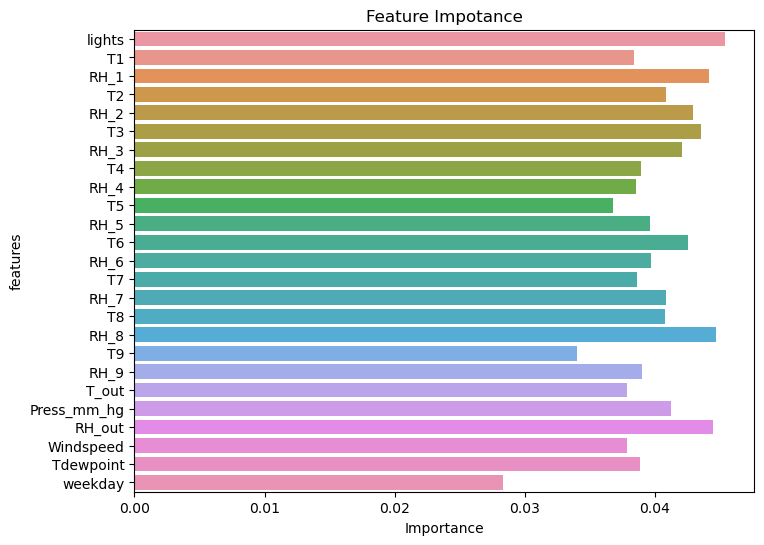

In [32]:
imp = et_m.feature_importances_
feat_imp = pd.DataFrame({'features':X_train.columns, 'Importance':imp})
plt.figure(figsize=(8,6))
sns.barplot(feat_imp, x='Importance', y='features')
plt.title('Feature Impotance')
plt.show()

In [38]:
x.columns

Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Tdewpoint', 'hour', 'weekday'],
      dtype='object')

In [39]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   lights       19735 non-null  float64
 1   T1           19735 non-null  float64
 2   RH_1         19735 non-null  float64
 3   T2           19735 non-null  float64
 4   RH_2         19735 non-null  float64
 5   T3           19735 non-null  float64
 6   RH_3         19735 non-null  float64
 7   T4           19735 non-null  float64
 8   RH_4         19735 non-null  float64
 9   T5           19735 non-null  float64
 10  RH_5         19735 non-null  float64
 11  T6           19735 non-null  float64
 12  RH_6         19735 non-null  float64
 13  T7           19735 non-null  float64
 14  RH_7         19735 non-null  float64
 15  T8           19735 non-null  float64
 16  RH_8         19735 non-null  float64
 17  T9           19735 non-null  float64
 18  RH_9         19735 non-null  float64
 19  T_ou

### Modeling

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 101)

In [41]:
lr_model=LinearRegression()
dt_model=DecisionTreeRegressor()
sv_model=SVR()
et_model=ExtraTreesRegressor()
rf_model=RandomForestRegressor()
gb_model=GradientBoostingRegressor()
xg_model=XGBRegressor()

In [42]:
sv_model.fit(X_train, y_train)
et_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xg_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

### Testing and Evaluation

In [43]:
# Testing and evaluation

def test_eva(model, Test, labels):

    pred=model.predict(Test) # Predict

    # Evaluation metrics
    mae=mean_absolute_error(labels, pred)
    rmse=np.sqrt(mean_squared_error(labels, pred))
    mape=mean_absolute_percentage_error(labels, pred)
    R2_score=r2_score(labels, pred)
    
    print(model,'\n')
    print('MAE       : {:0.6f} degrees'.format(mae))
    print('R^2 Score  : {:0.6f}' .format(R2_score))
    print('MAPE :{:0.6f}'.format(mape))
    print('RMSE : {:0.6f}'.format(rmse))
    print('Accuracy            : {:0.6f}%\n'.format(100*(1-mape)))


    

### Support Vector Regressor

In [44]:
test_eva(sv_model, X_test, y_test)

SVR() 

MAE       : 49.060530 degrees
R^2 Score  : -0.100393
MAPE :0.368135
RMSE : 108.214718
Accuracy            : 63.186546%



### Random Forest Regressor

In [45]:
test_eva(rf_model, X_test, y_test)

RandomForestRegressor() 

MAE       : 33.261189 degrees
R^2 Score  : 0.526844
MAPE :0.324914
RMSE : 70.960114
Accuracy            : 67.508637%



### Extra Tree

In [46]:
test_eva(et_model, X_test, y_test)

ExtraTreesRegressor() 

MAE       : 30.333643 degrees
R^2 Score  : 0.581595
MAPE :0.290003
RMSE : 66.728388
Accuracy            : 70.999688%



### XGboost

In [47]:
test_eva(xg_model, X_test, y_test)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) 

MAE       : 36.662043 degrees
R^2 Score  : 0.503923
MAPE :0.376203
RMSE : 72.658605
Accuracy            : 62.379681%



### GBoost

In [48]:
test_eva(gb_model, X_test, y_test)

GradientBoostingRegressor() 

MAE       : 46.410789 degrees
R^2 Score  : 0.298077
MAPE :0.507107
RMSE : 86.428509
Accuracy            : 49.289299%



### Optimization

Optimization for three of the models: RandomForest, ExtraTree, and XGBoost

#### RandomForest

In [49]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)] 

max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 3, 4, 5, 7, 10]  
min_samples_leaf = [1, 2, 4, 5]  
bootstrap = [True, False]  

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [50]:
rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [51]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 7,
                                                              10],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=42, verbose=2)

In [52]:
print(rf_random.best_params_)

{'n_estimators': 944, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 40, 'bootstrap': False}


In [53]:
rf_best=rf_random.best_estimator_

In [54]:
rf_best.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=40, max_features='log2',
                      n_estimators=944)

In [55]:
test_eva(rf_best, X_test, y_test)

RandomForestRegressor(bootstrap=False, max_depth=40, max_features='log2',
                      n_estimators=944) 

MAE       : 29.121064 degrees
R^2 Score  : 0.603585
MAPE :0.278085
RMSE : 64.951203
Accuracy            : 72.191472%



### ExtraTree

In [56]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)] 

max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 3, 4, 5, 7, 10]  
min_samples_leaf = [1, 2, 4, 5]  
bootstrap = [True, False]  

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [57]:
et_random = RandomizedSearchCV(estimator = et_model, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [58]:
et_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=False, max_depth=100, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=1155; total time=  28.8s
[CV] END bootstrap=False, max_depth=100, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=1155; total time=  32.3s
[CV] END bootstrap=False, max_depth=100, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=1155; total time=  41.6s
[CV] END bootstrap=False, max_depth=100, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=1155; total time=  39.6s
[CV] END bootstrap=False, max_depth=100, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=1155; total time=  46.3s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimat

RandomizedSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 7,
                                                              10],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=42, verbose=2)

In [59]:
print(et_random.best_params_)

{'n_estimators': 944, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 40, 'bootstrap': False}


In [60]:
et_best=et_random.best_estimator_

In [62]:
et_best.fit(X_train, y_train)

ExtraTreesRegressor(max_depth=40, max_features='log2', n_estimators=944)

In [63]:
test_eva(et_best, X_test, y_test)

ExtraTreesRegressor(max_depth=40, max_features='log2', n_estimators=944) 

MAE       : 28.791612 degrees
R^2 Score  : 0.615430
MAPE :0.274565
RMSE : 63.973469
Accuracy            : 72.543475%



#### XGBoost

In [64]:

param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [1, 2, 3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'reg_alpha': [0, 0.01, 0.05, 0.1, 1],
    'reg_lambda': [0, 0.01, 0.05, 0.1, 1]
}
kfold=KFold(n_splits=5)

xg_search=RandomizedSearchCV(estimator=xg_model, param_distributions=param_dist, n_iter=10, n_jobs=-1, cv=kfold, random_state=101)

xg_search.fit(X_train, y_train)
xg_param=xg_search.best_params_

print(f'xgboost best parameters={xg_param}')

xgboost best parameters={'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.15, 'gamma': 0.3, 'colsample_bytree': 0.8}


In [65]:
## Prediction
xg_best=xg_search.best_estimator_

In [66]:
test_eva(xg_best, X_test, y_test)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.3, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.15, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) 

MAE       : 34.410651 degrees
R^2 Score  : 0.533152
MAPE :0.345108
RMSE : 70.485590
Accuracy            : 65.489206%



### Support vector tuning

In [67]:
# Define the parameter distribution for RandomizedSearchCV
from scipy.stats import uniform
param_distributions = {
    'C': uniform(0.1, 100),
    'epsilon': uniform(0.01, 1),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Define the scoring method
scoring = make_scorer(mean_squared_error, greater_is_better=False)

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(sv_model, param_distributions, n_iter=10, cv=5, scoring=scoring, verbose=2, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best mean squared error: {-random_search.best_score_}")



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'C': 51.523443841361164, 'epsilon': 0.6024145688620425, 'gamma': 'scale', 'kernel': 'linear'}
Best mean squared error: 9232.680614372784


In [68]:
# Train the final model with the best parameters
sv_best = random_search.best_estimator_
sv_best.fit(X_train, y_train)

SVR(C=51.523443841361164, epsilon=0.6024145688620425, kernel='linear')

In [69]:
test_eva(sv_best, X_test, y_test)

SVR(C=51.523443841361164, epsilon=0.6024145688620425, kernel='linear') 

MAE       : 48.625715 degrees
R^2 Score  : 0.124464
MAPE :0.472044
RMSE : 96.527103
Accuracy            : 52.795608%



### Saving the model

In [ ]:
# Import the pickle
#import pickle

#data={'Model':et_best}
#with open('EnergyPredictor.pkl', 'wb') as file:
#    pickle.dump(data, file)

In [ ]:
#with open('EnergyPredictor.pkl', 'rb') as file:
#    data=pickle.load(file)

In [ ]:
#model=data['Model']
#model.predict(X_test)

In [ ]:
#X_test.columns

In [ ]:
#error_et=pd.DataFrame({'True_value':y_test, 'Predicted':model.predict(X_test), 'Error':model.predict(X_test)-y_test})
#error_et

In [102]:
base_model = pd.DataFrame({'Model':['ETR', 'RF', 'SVR','XGB'], 'MAE':[30.33, 33.26, 49.06, 36.66],
                          'R2_SCORE':[58, 52.7, -10.04, 50.3], 'MAPE':[29, 32.41, 36.81, 37.6], 'RMSE':[66.73, 70.96, 108.21, 72.65]})

In [103]:
optimized_model = pd.DataFrame({'Model':['ETR', 'RF', 'SVR','XGB'], 'MAE':[28.72, 28.98, 48.99, 34.10],
                          'R2_SCORE':[61.7, 60.6, 12.8, 54.8], 'MAPE':[27.4, 27.7, 48.3, 34.4], 'RMSE':[63.85, 64.78, 96.33, 69.39]})

In [104]:
joined = pd.concat([base_model, optimized_model], keys=['Baseline', 'Optimized'] )

In [109]:
data = joined.reset_index().drop('level_1', axis=1)
data = data.rename({'level_0':'Level'}, axis=1)

In [110]:
data

,Level,Model,MAE,R2_SCORE,MAPE,RMSE
0,Baseline,ETR,30.33,58.00,29.00,66.73
1,Baseline,RF,33.26,52.70,32.41,70.96
2,Baseline,SVR,49.06,-10.04,36.81,108.21
3,Baseline,XGB,36.66,50.30,37.60,72.65
4,Optimized,ETR,28.72,61.70,27.40,63.85
5,Optimized,RF,28.98,60.60,27.70,64.78
6,Optimized,SVR,48.99,12.80,48.30,96.33
7,Optimized,XGB,34.10,54.80,34.40,69.39


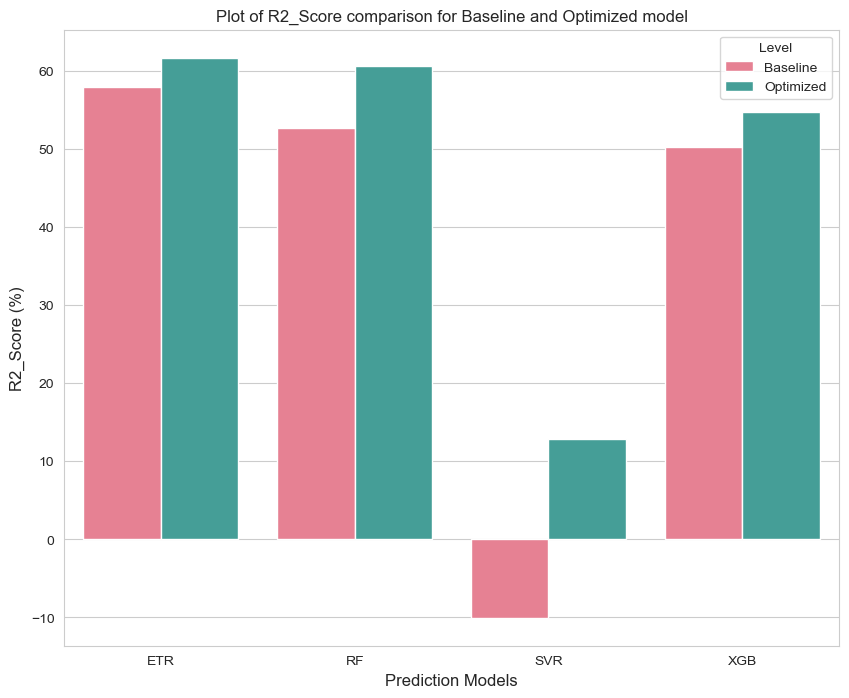

In [115]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.barplot(x='Model', y='R2_SCORE', hue='Level', palette = sns.color_palette("husl", 2), data=data,
          errorbar = 'sd')


#g.despine(left=True)
#g.set_axis_labels("", "R2_Score (%)")
#g.legend.set_title("")
plt.title('Plot of R2_Score comparison for Baseline and Optimized model', fontsize = 14)
plt.xlabel('Prediction Models',  fontsize = 12)
plt.ylabel('R2_Score (%)', fontsize = 12)
plt.show()

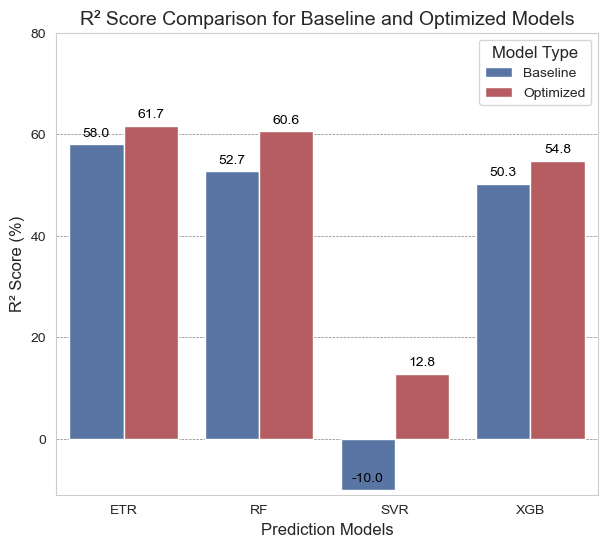

In [122]:
plt.figure(figsize=(7, 6))
sns.set_style('whitegrid')

# Barplot
barplot = sns.barplot(x='Model', y='R2_SCORE', hue='Level', palette=sns.color_palette(["#4c72b0", "#c44e52"]), data=data)
plt.title('R² Score Comparison for Baseline and Optimized Models', fontsize=14)
plt.xlabel('Prediction Models', fontsize=12)
plt.ylabel('R² Score (%)', fontsize=12)

# Add labels on top of each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 8), textcoords = 'offset points',
                     fontsize=10, color='black')

# Set y-axis limits and customize grid
plt.ylim(-11, 80)
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# Improve legend placement and style
plt.legend(title='Model Type', loc='upper right', fontsize=10, title_fontsize='12')
plt.savefig('Model Comparison')
plt.show()

### Feature Importance

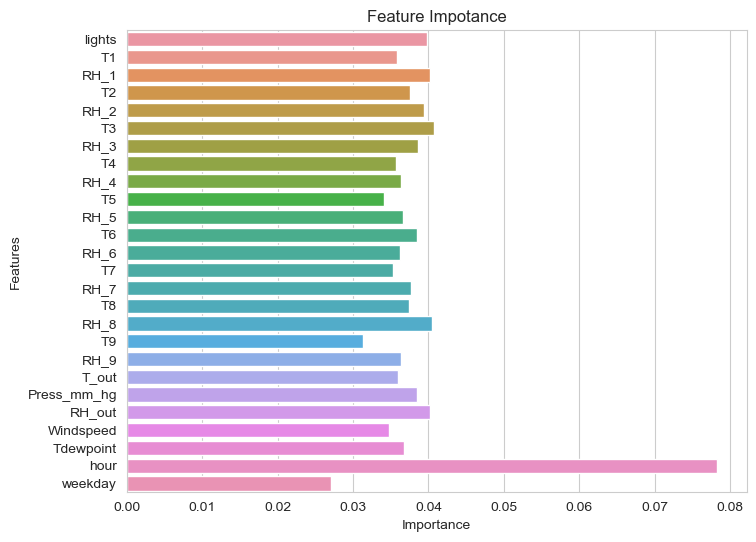

In [131]:

imp_features=et_best.feature_importances_
feature_importance=pd.DataFrame({'Features':X_train.columns, 'Importance':imp_features})

plt.figure(figsize=(8,6))
sns.barplot(feature_importance, x='Importance', y='Features')
plt.title('Feature Impotance')
plt.savefig('Feature_Importance_no_month.png')
plt.show()

In [125]:
y_pred_rf = rf_best.predict(X_test)
y_pred_et = et_best.predict(X_test)
y_pred_svm = sv_best.predict(X_test)
y_pred_xgb = xg_best.predict(X_test)

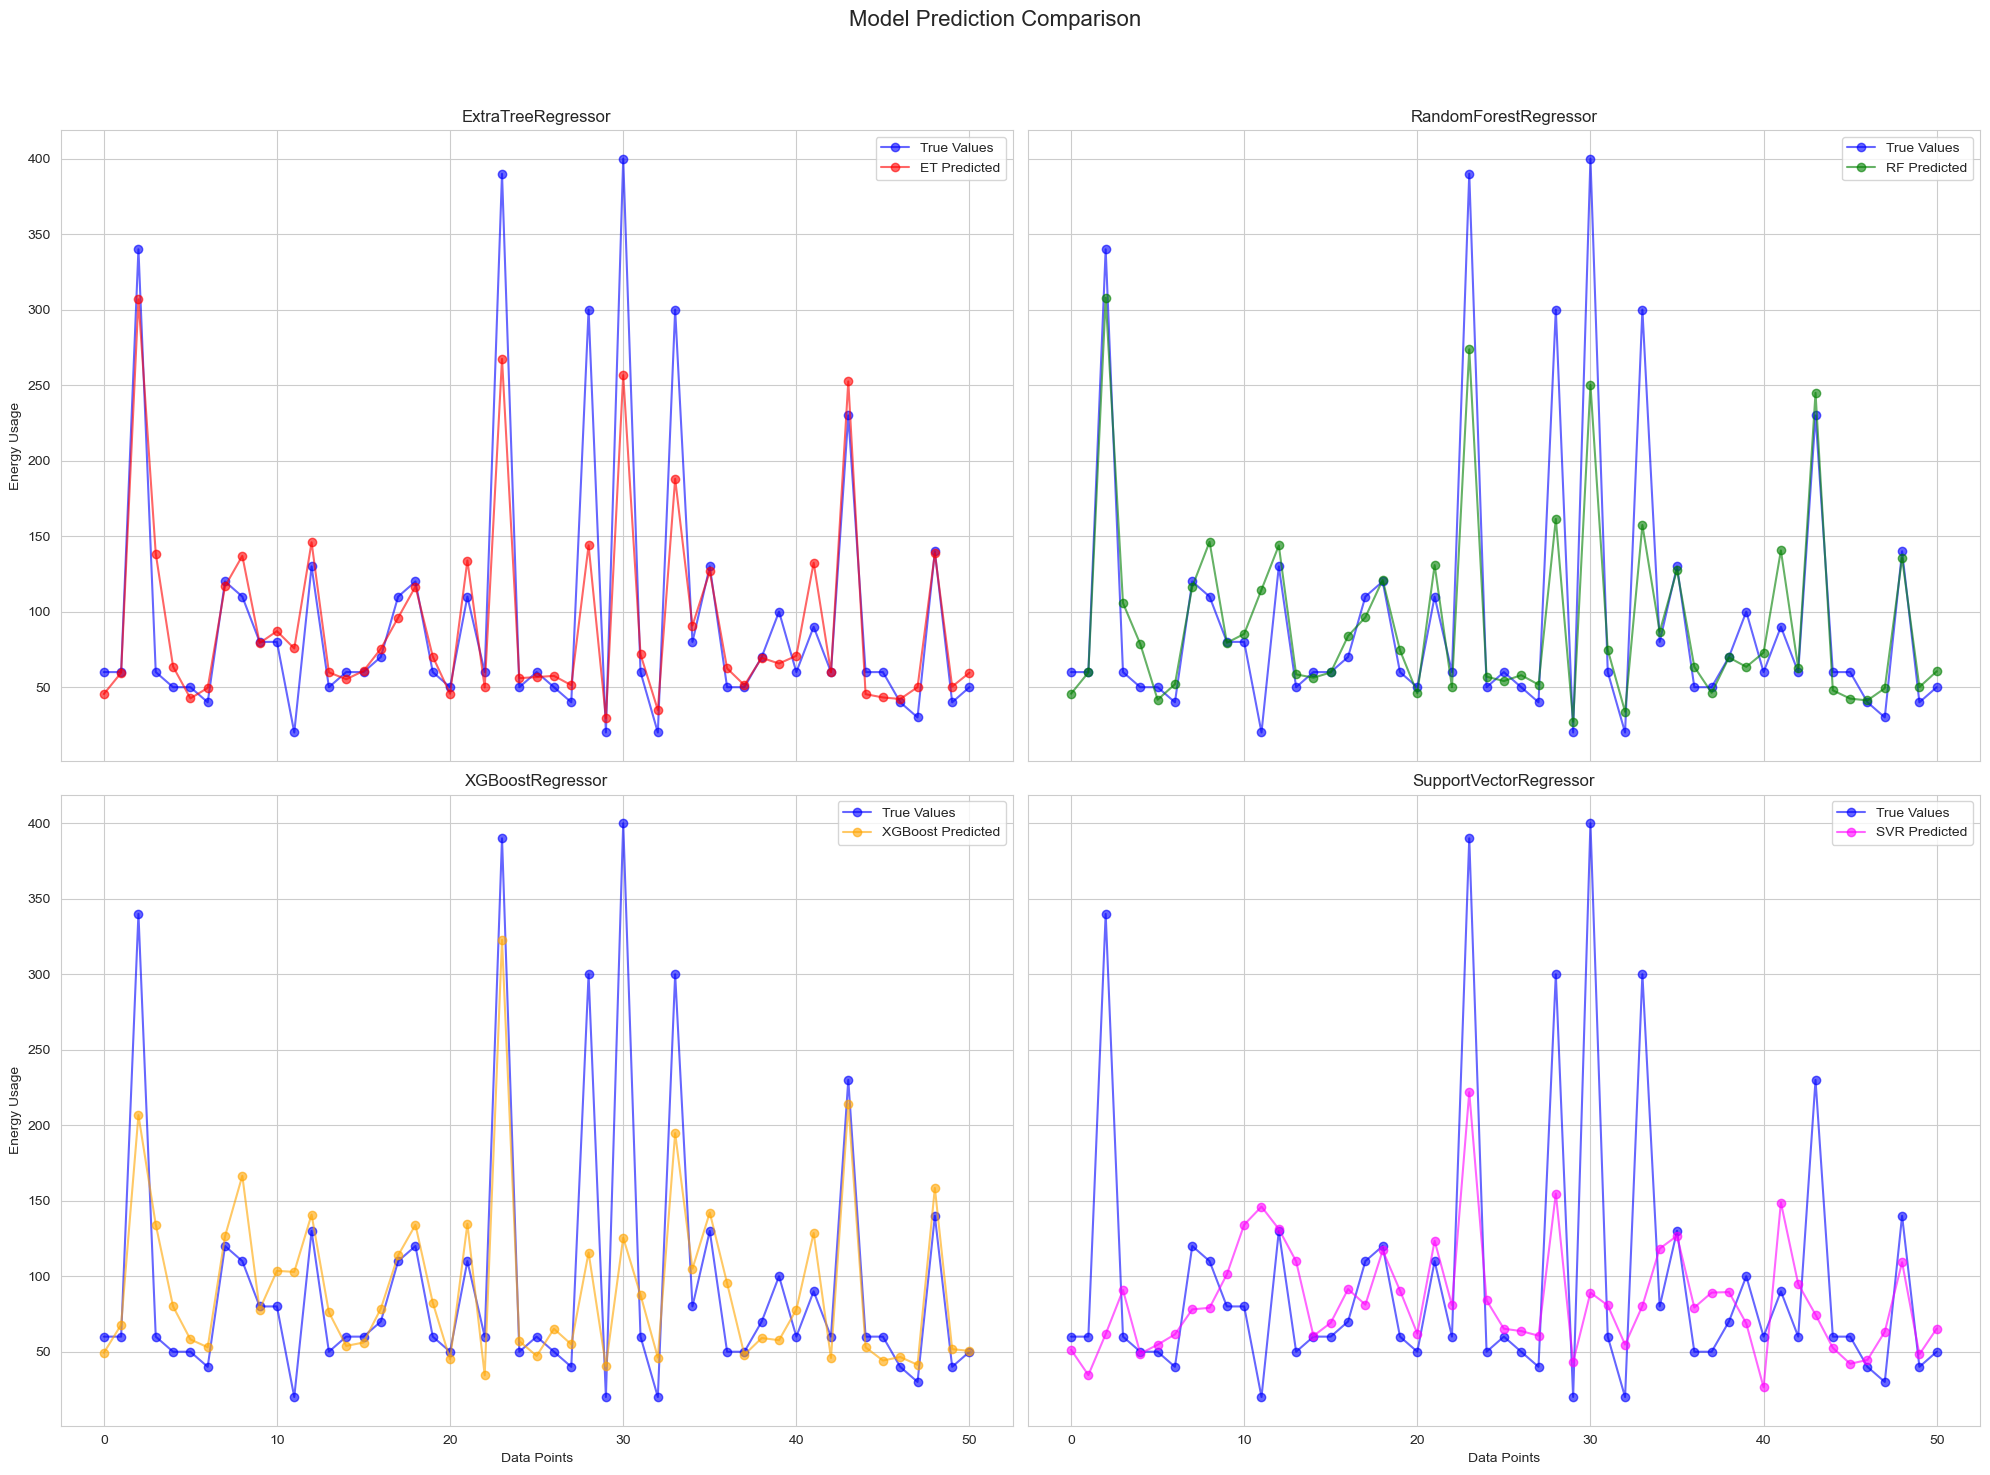

In [126]:
# Plotting
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Model Prediction Comparison', fontsize=16)

# True values
axes[0, 0].plot(range(0, 51), y_test[:51], color='blue', label='True Values', alpha=0.6, marker='o')
axes[0, 0].plot(range(0, 51), y_pred_et[:51], color='red', label='ET Predicted', alpha=0.6, marker='o')
axes[0, 0].set_title('ExtraTreeRegressor')
axes[0, 0].set_xlabel('Data Points')
axes[0, 0].set_ylabel('Energy Usage')

axes[0, 1].plot(range(0, 51), y_test[:51], color='blue', label='True Values', alpha=0.6, marker='o')
axes[0, 1].plot(range(0, 51), y_pred_rf[:51], color='green', label='RF Predicted', alpha=0.6, marker='o')
axes[0, 1].set_title('RandomForestRegressor')
axes[0, 1].set_xlabel('Data Points')

axes[1, 0].plot(range(0, 51), y_test[:51], color='blue', label='True Values', alpha=0.6, marker='o')
axes[1, 0].plot(range(0, 51), y_pred_xgb[:51], color='orange', label='XGBoost Predicted', alpha=0.6, marker='o')
axes[1, 0].set_title('XGBoostRegressor')
axes[1, 0].set_xlabel('Data Points')
axes[1, 0].set_ylabel('Energy Usage')

axes[1, 1].plot(range(0, 51), y_test[:51], color='blue', label='True Values', alpha=0.6, marker='o')
axes[1, 1].plot(range(0, 51), y_pred_svm[:51], color='magenta', label='SVR Predicted', alpha=0.6, marker='o')
axes[1, 1].set_title('SupportVectorRegressor')
axes[1, 1].set_xlabel('Data Points')

# Add legends
for ax in axes.flat:
    ax.legend()
    ax.label_outer()  # Only show outer labels to avoid redundancy

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust top to fit the title
plt.savefig('Model_Comparison_TrueVsPred.png')
plt.show()

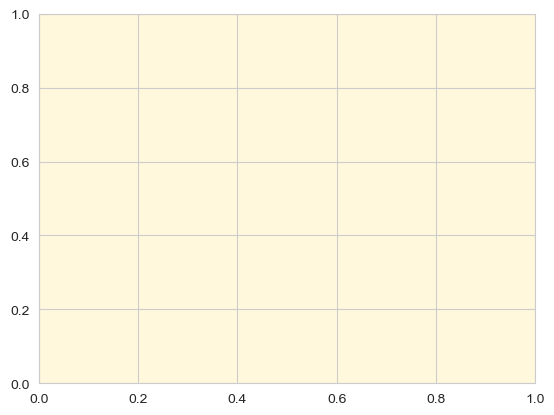

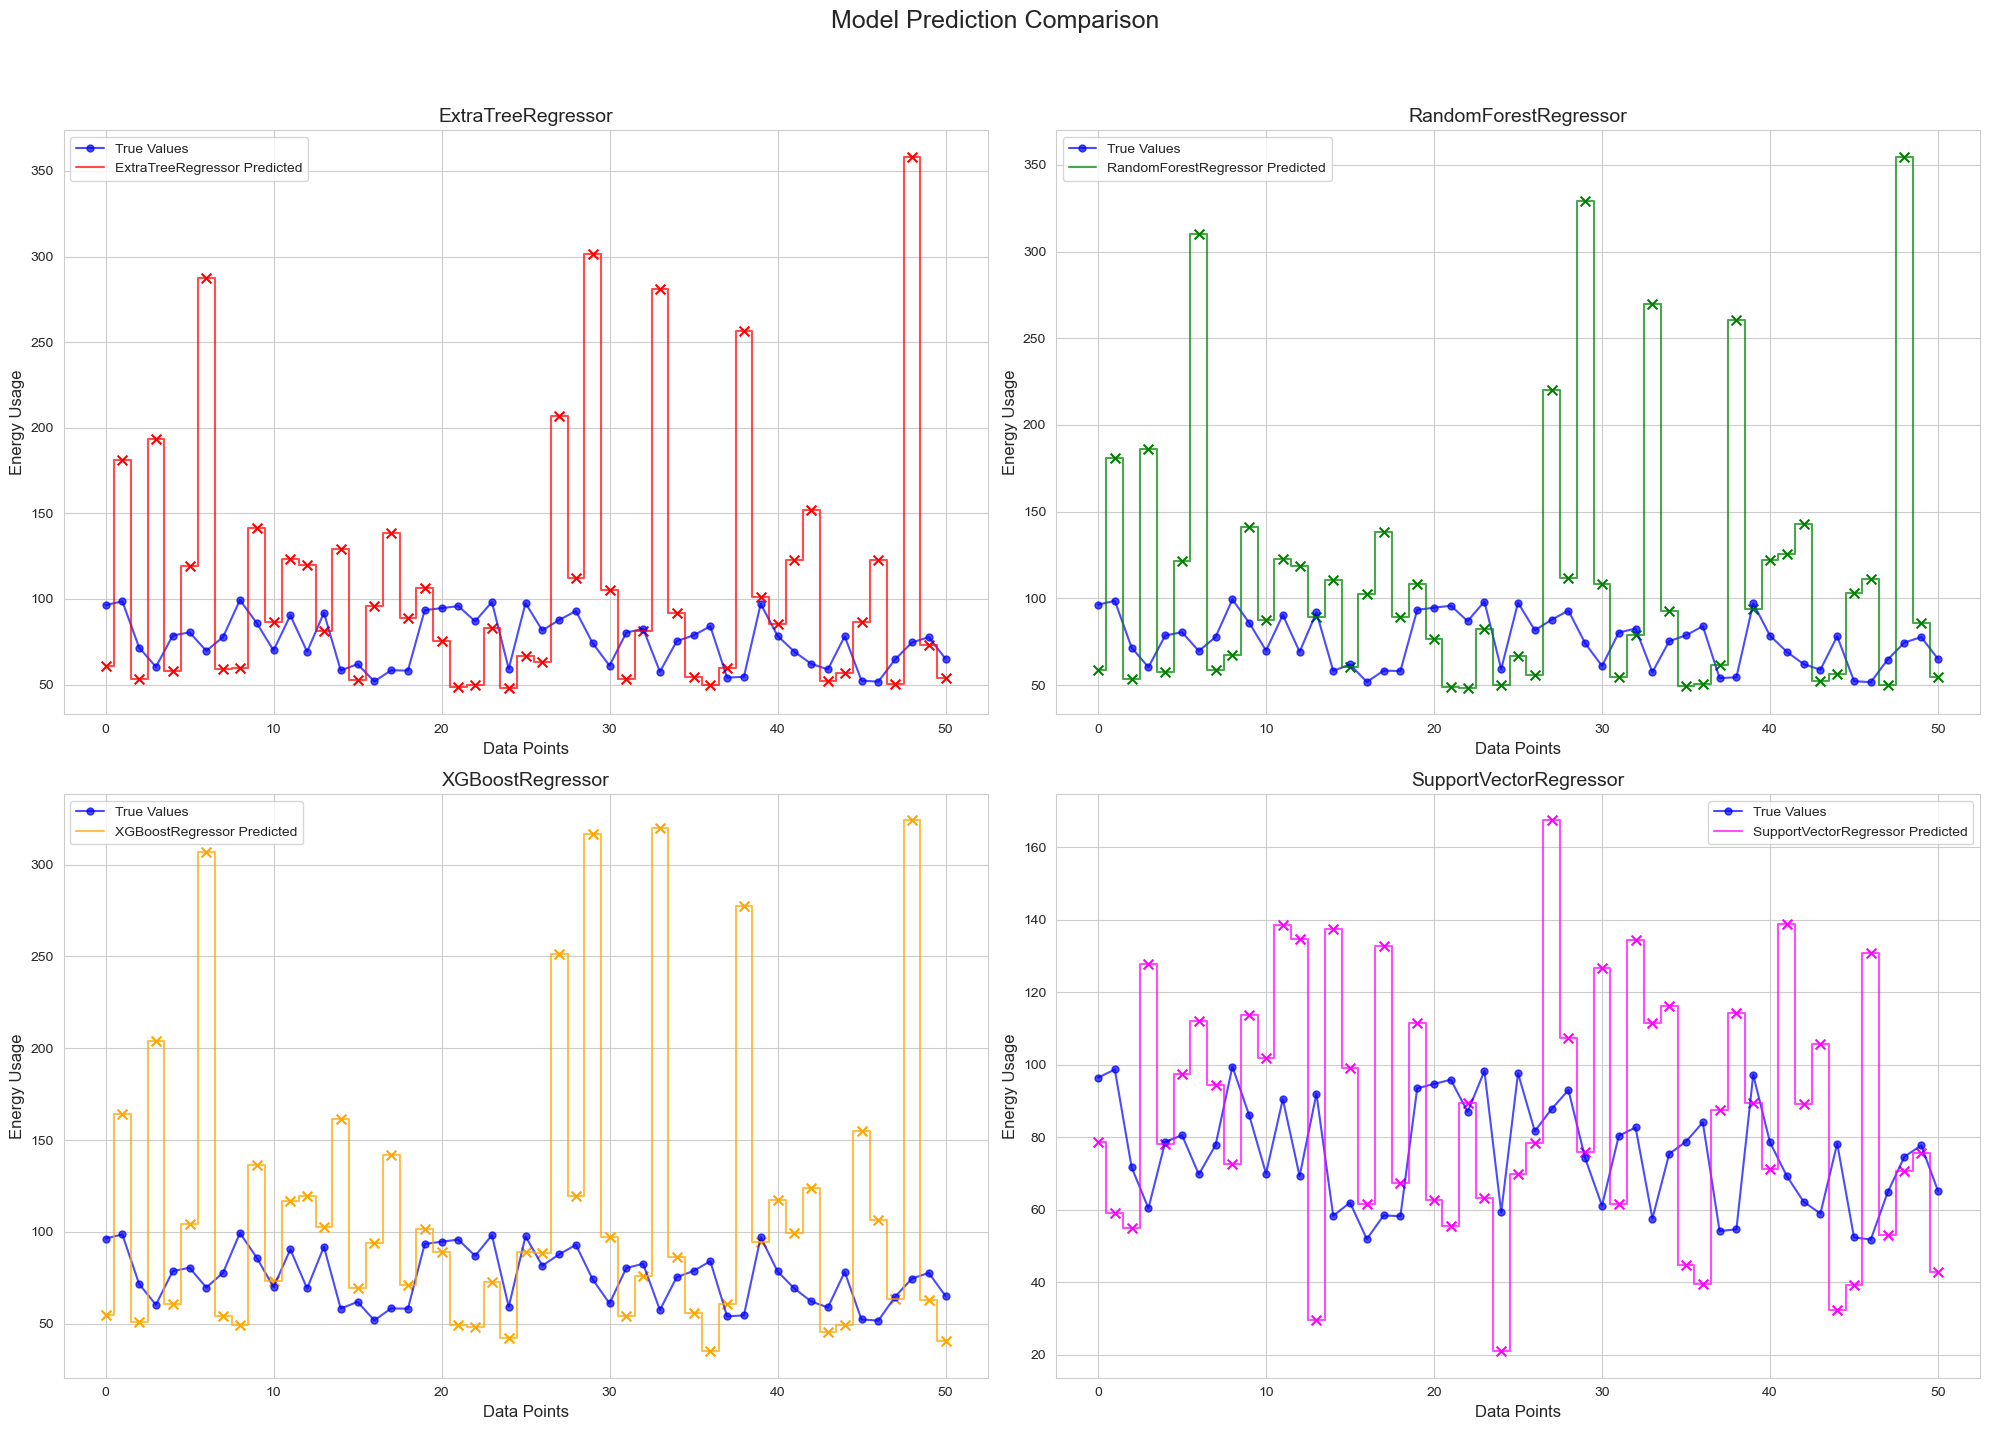

In [130]:
# Import libraries if not already
import matplotlib.pyplot as plt
plt.gca().set_facecolor('#fff8dc')
# Plotting
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Model Prediction Comparison', fontsize=18)

# Define the color scheme for the models and true values
true_color = 'blue'
pred_colors = ['red', 'green', 'orange', 'magenta']

# Plot settings
plot_configs = [
    (axes[0, 0], y_pred_et[100:151], pred_colors[0], 'ExtraTreeRegressor'),
    (axes[0, 1], y_pred_rf[100:151], pred_colors[1], 'RandomForestRegressor'),
    (axes[1, 0], y_pred_xgb[100:151], pred_colors[2], 'XGBoostRegressor'),
    (axes[1, 1], y_pred_svm[100:151], pred_colors[3], 'SupportVectorRegressor')
]

# Plot each model with distinct points and bars for the forecast pattern
for ax, y_pred, color, title in plot_configs:
    # True values as a continuous line for reference
    ax.plot(range(0, 51), y_test[:51], color=true_color, label='True Values', marker='o', markersize=5, linestyle='-', alpha=0.7)
    
    # Forecasted values with step plot style and points for prediction
    ax.step(range(0, 51), y_pred, where='mid', color=color, label=f'{title} Predicted', linestyle='-', alpha=0.7)
    ax.scatter(range(0, 51), y_pred, color=color, marker='x', s=50)  # Points for each prediction
    
    # Title, labels, and legend
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Data Points', fontsize=12)
    ax.set_ylabel('Energy Usage', fontsize=12)
    ax.legend()

# Layout adjustments
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit suptitle
plt.savefig('Model_Comparison_TrueVsPrednew.png')
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))


plt.plot(range(0, 31), y_test[:31], color='blue', label='True Values', alpha=0.6, marker='o')

plt.plot(range(0, 31), y_pred_et[:31], color='red', label='ETR Predicted', alpha=0.6, marker='o')
plt.plot(range(0, 31), y_pred_rf[:31], color='green', label='RFR Predicted', alpha=0.6, marker='o')
plt.plot(range(0, 31), y_pred_svm[:31], color='yellow', label='SVR Predicted', alpha=0.6, marker='o')
plt.plot(range(0, 31), y_pred_xgb[:31], color='magenta', label='XGBoost Predicted', alpha=0.6, marker='o')

plt.title('Model Prediction Comparison', fontsize=16)
plt.tight_layout()
plt.legend()
plt.savefig('Joined_Model_Comparison_TrueVsPred1.png')
plt.show()

### Model Residual Plot

In [ ]:
# Residuals
residuals_rf = y_test - y_pred_rf
residuals_et = y_test - y_pred_et
residuals_svm = y_test - y_pred_svm
residuals_xgb = y_test - y_pred_xgb

# Plotting function
def plot_residuals(y_test, y_pred, residuals, model_name):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Regression Plot ({model_name})')
    
    plt.subplot(1, 2, 2)
    plt.scatter(y_pred, residuals)
    plt.hlines(0, y_pred.min(), y_pred.max(), colors='red')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot ({model_name})')
    plt.tight_layout()
    plt.show()

# Plot for each model
plot_residuals(y_test, y_pred_rf, residuals_rf, 'RandomForestRegressor')
plot_residuals(y_test, y_pred_et, residuals_et, 'ExtraTreeRegressor')
plot_residuals(y_test, y_pred_svm, residuals_svm, 'SupportVectorRegressor')
plot_residuals(y_test, y_pred_xgb, residuals_xgb, 'XGBoostRegressor')

### Optimization

In [ ]:
pred_train = et_best.predict(X_train)
MAE=mean_absolute_error(y_train, pred_train)
R2=r2_score(y_train, pred_train)